# Sea ice animation

In [5]:
pip install celluloid

Note: you may need to restart the kernel to use updated packages.


In [6]:

from datetime import timedelta, datetime
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mticker

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

from IPython.display import HTML

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cmocean
import pandas as pd

from celluloid import Camera
from cftime import num2date

In [7]:
# Load the NetCDF file
ds = xr.open_dataset("polynyaBBM_188C.diagnostic.nc", group="/data")
print(ds)

# We (still) need to fetch the mask from the init file

mask = xr.open_dataset("init_square.nc", group="/data")['mask']
land = np.where(mask == 0, 1, np.nan)  # 1 = land, nan = ocean

time = ds['time']
time_vals = num2date(time.values, units='seconds since 1970-01-01', calendar='gregorian')

time_index = 2

<xarray.Dataset>
Dimensions:         (time: 6, ydim: 50, xdim: 100, dg_comp: 6, yvertex: 51,
                     xvertex: 101, ncoords: 2, zdim: 3)
Coordinates:
  * time            (time) float64 1.68e+09 1.68e+09 ... 1.68e+09 1.68e+09
Dimensions without coordinates: ydim, xdim, dg_comp, yvertex, xvertex, ncoords,
                                zdim
Data variables: (12/58)
    C_ICE_DG        (time, ydim, xdim, dg_comp) float64 ...
    H_ICE_DG        (time, ydim, xdim, dg_comp) float64 ...
    OW_STRESS_X     (time, ydim, xdim) float64 ...
    OW_STRESS_Y     (time, ydim, xdim) float64 ...
    Q_SW_BASE       (time, ydim, xdim) float64 ...
    Q_SW_OW         (time, ydim, xdim) float64 ...
    ...              ...
    v               (time, ydim, xdim) float64 ...
    wind_speed      (time, ydim, xdim) float64 ...
    wind_u          (time, ydim, xdim) float64 ...
    wind_v          (time, ydim, xdim) float64 ...
    x               (time, ydim, xdim) float64 ...
    y             

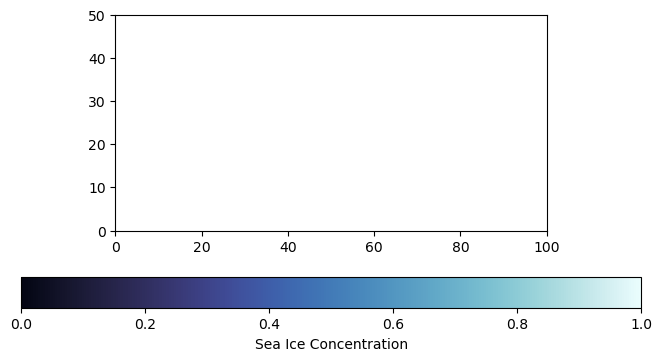

In [8]:
fig, ax = plt.subplots(figsize = (8,4))
camera = Camera(fig)

for time_index in range(len(time)):
    var = ds['cice'].isel(time=time_index).isel(dg_comp=0)
    p = ax.pcolormesh(var, shading='auto', cmap='cmo.ice', vmin=0, vmax=1)
    ax.pcolormesh(land, shading='auto', cmap='Pastel2', vmin=0, vmax=1)
    plt.gca().set_aspect('equal')
    camera.snap()

plt.colorbar(p, label='Sea Ice Concentration', orientation='horizontal')


animation = camera.animate()
animation.save('BBM_TNB_190C.gif', writer = 'pillow')



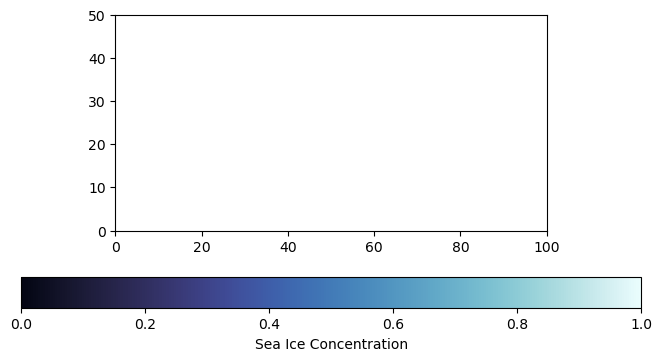

In [9]:
fig, ax = plt.subplots(figsize = (8,4))
camera = Camera(fig)

for time_index in range(len(time)):
    var = ds['hice'].isel(time=time_index).isel(dg_comp=0)
    p = ax.pcolormesh(var, shading='auto', cmap='cmo.ice', vmin=0, vmax=1)
    ax.pcolormesh(land, shading='auto', cmap='Pastel2', vmin=0, vmax=1)
    plt.gca().set_aspect('equal')
    camera.snap()

plt.colorbar(p, label='Sea Ice Concentration', orientation='horizontal')


animation = camera.animate()
animation.save('BBM_TNB_190Chice.gif', writer = 'pillow')
